In [1]:
from google.colab import files
uploaded=files.upload()


Saving Logistic_X_Test.csv to Logistic_X_Test.csv
Saving Logistic_X_Train.csv to Logistic_X_Train.csv
Saving Logistic_Y_Train.csv to Logistic_Y_Train.csv


In [2]:
 import pandas as pd
 import numpy as np
 dfx=pd.read_csv("Logistic_X_Train.csv")
 dfy=pd.read_csv("Logistic_Y_Train.csv")
 

In [3]:
dfx.head(n=5)

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
dfy.head(n=5)

,label
0,1
1,1
2,1
3,0
4,0


In [5]:
X=dfx.values
Y=dfy.values

In [12]:
dfx.corr()

,f1,f2,f3
f1,1.000000,0.553890,0.650504
f2,0.553890,1.000000,0.137088
f3,0.650504,0.137088,1.000000


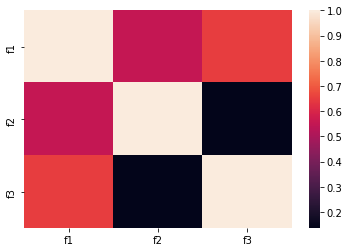

In [13]:
import seaborn as sns
sns.heatmap(dfx.corr())

In [17]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,multi_class="ovr")
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(X)
model=clf.fit(std,Y.ravel())


In [18]:
X_test= pd.read_csv("Logistic_X_Test.csv")
Y_test=model.predict(X_test)

In [19]:
df=pd.DataFrame(data=Y_test,columns=["label"])

df.to_csv("y_predictions.csv",index=False)

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, std, Y.ravel(), cv=5)

array([0.99666667, 0.99166667, 0.99666667, 0.99666667, 0.99333333])